## En este Notebook se hace un análisis exploratorio de los datos de una tienda que vende a pedido a nivel internacional. Los datos corresponden a los años 2018,2019, 2020 y 2021.Se hace al final una proyección de ganancias para los años 2022 y 2023 usando regresión lineal.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']=200


In [2]:
df=pd.read_excel('Muestra - Supertienda.xls')

In [3]:
df.dtypes

Id. de la fila                  int64
Id. del pedido                 object
Fecha del pedido       datetime64[ns]
Fecha de envío         datetime64[ns]
Forma de envío                 object
Id. del cliente                object
Nombre del cliente             object
Segmento                       object
Ciudad                         object
Estado                         object
País/Región                    object
Región                         object
Id. del producto               object
Categoría                      object
Subcategoría                   object
Nombre del producto            object
Ventas                        float64
Cantidad                        int64
Descuento                     float64
Ganancia                      float64
dtype: object

Notemos que las columnas "Fecha del pedido" y "Fecha de envío" tienen el formato correcto de fecha.

In [4]:
df.head()

,Id. de la fila,Id. del pedido,Fecha del pedido,Fecha de envío,Forma de envío,Id. del cliente,Nombre del cliente,Segmento,Ciudad,Estado,País/Región,Región,Id. del producto,Categoría,Subcategoría,Nombre del producto,Ventas,Cantidad,Descuento,Ganancia
0,1682,MX-2021-111899,2021-04-02,2021-04-06,Estándar,AM-11365,Araceli Manzanares,Empresa,Cruzeiro do Sul,Acre,Brasil,Sur,MAT-AR-10004857,Material de oficina,Arte,"Boston Rotuladores, Tamaños variados",591.0,3,0.0,206.4
1,5919,MX-2021-113922,2021-10-08,2021-10-11,Rápido,BS-12130,Benjamín Saavedra,Cliente,Rio Branco,Acre,Brasil,Sur,MOB-LI-10000647,Mobiliario,Librerías,"Dania Conjunto de estantes, Metal",2250.8,2,0.0,922.8
2,5920,MX-2021-113922,2021-10-08,2021-10-11,Rápido,BS-12130,Benjamín Saavedra,Cliente,Rio Branco,Acre,Brasil,Sur,MAT-CA-10002956,Material de oficina,Carpetas,"Avery Anillas, Transparente",129.0,5,0.0,11.0
3,9013,MX-2019-163888,2019-06-14,2019-06-18,Estándar,AT-10090,Alejandro Trejo,Cliente,Rio Branco,Acre,Brasil,Sur,MOB-MO-10002100,Mobiliario,Mobiliario,"Tenex Bandeja apiladora, Negro",504.6,3,0.0,95.4
4,9014,MX-2019-163888,2019-06-14,2019-06-18,Estándar,AT-10090,Alejandro Trejo,Cliente,Rio Branco,Acre,Brasil,Sur,MOB-LI-10002747,Mobiliario,Librerías,"Safco Vitrina, Convencional",3376.8,3,0.0,641.4


In [5]:
df.shape

(10254, 20)

Son 10254 filas y 20 features.

In [6]:
df.columns

Index(['Id. de la fila', 'Id. del pedido', 'Fecha del pedido',
       'Fecha de envío', 'Forma de envío', 'Id. del cliente',
       'Nombre del cliente', 'Segmento', 'Ciudad', 'Estado', 'País/Región',
       'Región', 'Id. del producto', 'Categoría', 'Subcategoría',
       'Nombre del producto', 'Ventas', 'Cantidad', 'Descuento', 'Ganancia'],
      dtype='object')

In [7]:
df.isnull().sum()

Id. de la fila         0
Id. del pedido         0
Fecha del pedido       0
Fecha de envío         0
Forma de envío         0
Id. del cliente        0
Nombre del cliente     0
Segmento               0
Ciudad                 0
Estado                 0
País/Región            0
Región                 0
Id. del producto       0
Categoría              0
Subcategoría           0
Nombre del producto    0
Ventas                 0
Cantidad               0
Descuento              0
Ganancia               0
dtype: int64

No hay datos nulos.(missing data)

¿De cuántos países diferentes son las transacciones?

In [8]:
df['País/Región'].unique()

array(['Brasil', 'Perú', 'Colombia', 'Chile', 'Venezuela', 'Cuba',
       'Paraguay', 'Honduras', 'Ecuador', 'México',
       'República Dominicana', 'Uruguay', 'Argentina',
       'Trinidad y Tobago', 'Guatemala', 'Panamá', 'Bolivia',
       'El Salvador', 'Haití', 'Nicaragua', 'Barbados', 'Jamaica'],
      dtype=object)

In [9]:
df['País/Región'].nunique()

22

Son de 22 países diferentes americanos diferentes.


Formas de envío diferentes:

In [10]:
df['Forma de envío'].unique()

array(['Estándar', 'Rápido', 'Urgente', 'Mismo día'], dtype=object)

¿Qué país cuenta con más transacciones?

<AxesSubplot:>

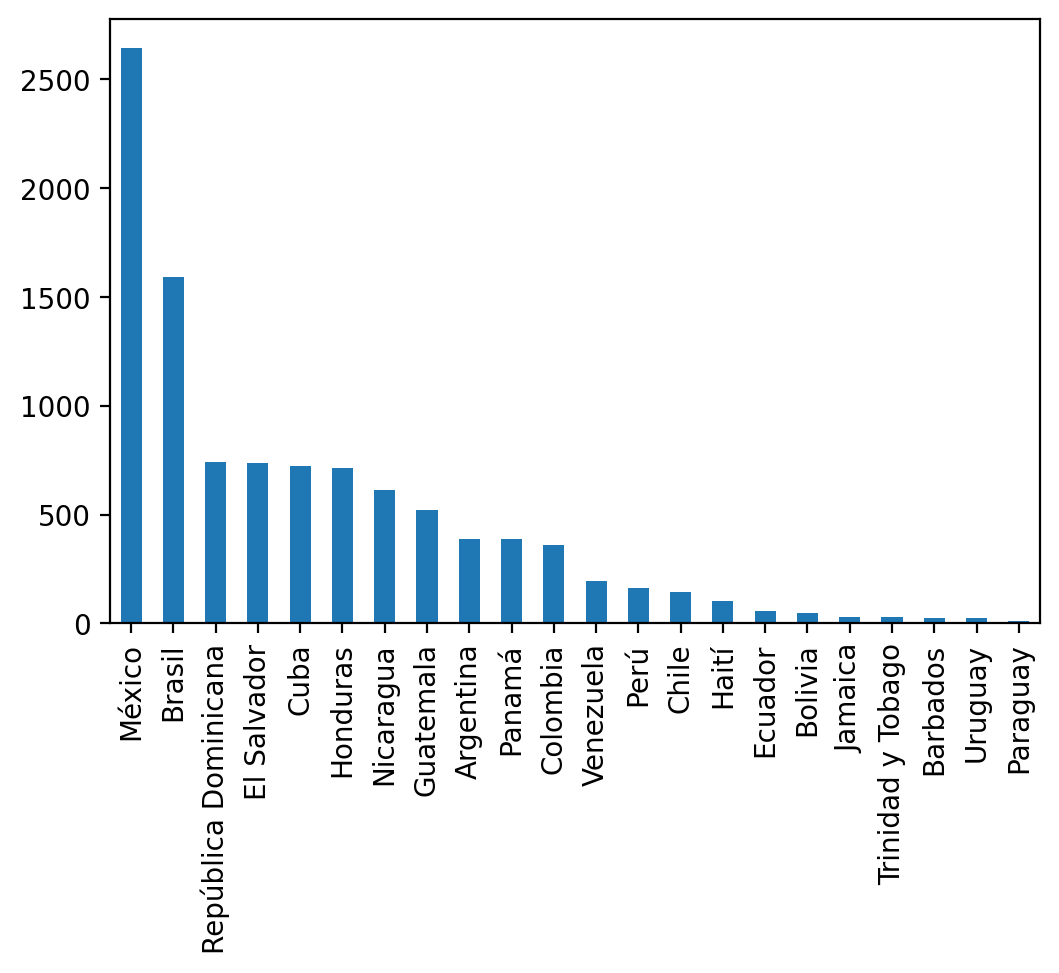

In [11]:
df['País/Región'].value_counts().plot.bar()
# para rotar labels:plt.xticks(rotation= )

In [12]:
df['País/Región'].value_counts()[0]

2643

México es el que registra más transacciones. En total 2643.

¿Qué y cuántas categorías de productos se venden?

In [13]:

df['Categoría'].unique()

array(['Material de oficina', 'Mobiliario', 'Tecnología'], dtype=object)

Se venden sólo tres categorías de productos.

Cuáles es la categoría más vendida por unidad?

In [14]:
df['Categoría'].value_counts()

Material de oficina    5836
Mobiliario             2371
Tecnología             2047
Name: Categoría, dtype: int64

La categoría más vendida es: Material de oficina

¿Cuál es la categoría que aporta más ganancias?

In [15]:
totgan=pd.DataFrame({'Categoría':df['Categoría'].tolist(),' Ganancia':df['Ganancia'].tolist()})

In [16]:
totgan.groupby(by='Categoría').sum()

,Ganancia
Categoría,
Material de oficina,7.887264e+05
Mobiliario,4.091854e+05
Tecnología,1.004004e+06


La categoría que aporta más ganancias es: Tecnología.

<AxesSubplot:xlabel='Categoría'>

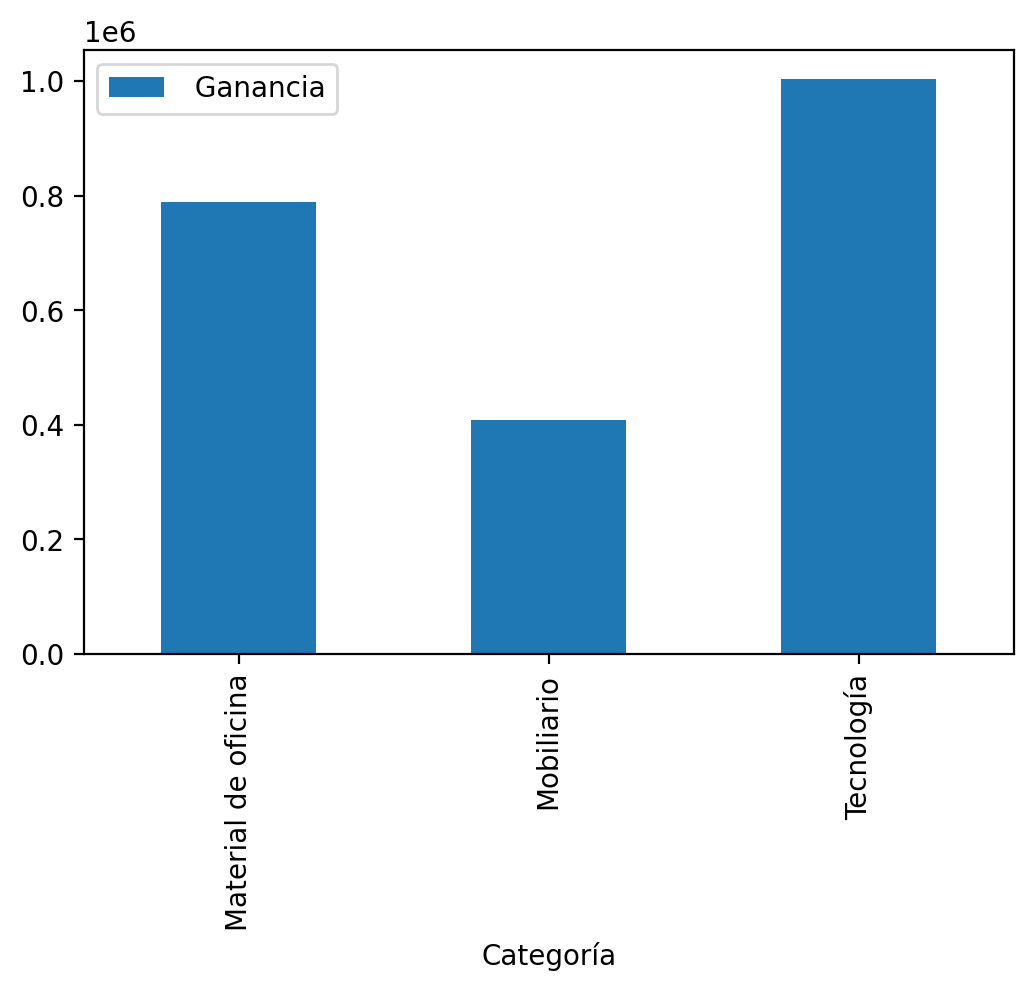

In [17]:
totgan.groupby(by='Categoría').sum().plot.bar()

Obtengamos el total de ganancias año por año, es decir, desde 2018 hasta 2021.

Primero agreguemos al dataframe las columnas de año y Mes:

In [18]:
df['Año']=df['Fecha del pedido'].dt.year
df['Mes']=df['Fecha del pedido'].dt.month

In [19]:
df[{'Año','Mes'}].head()

,Mes,Año
0,4,2021
1,10,2021
2,10,2021
3,6,2019
4,6,2019


 Las ganacias totales  año por año:

<AxesSubplot:xlabel='Año'>

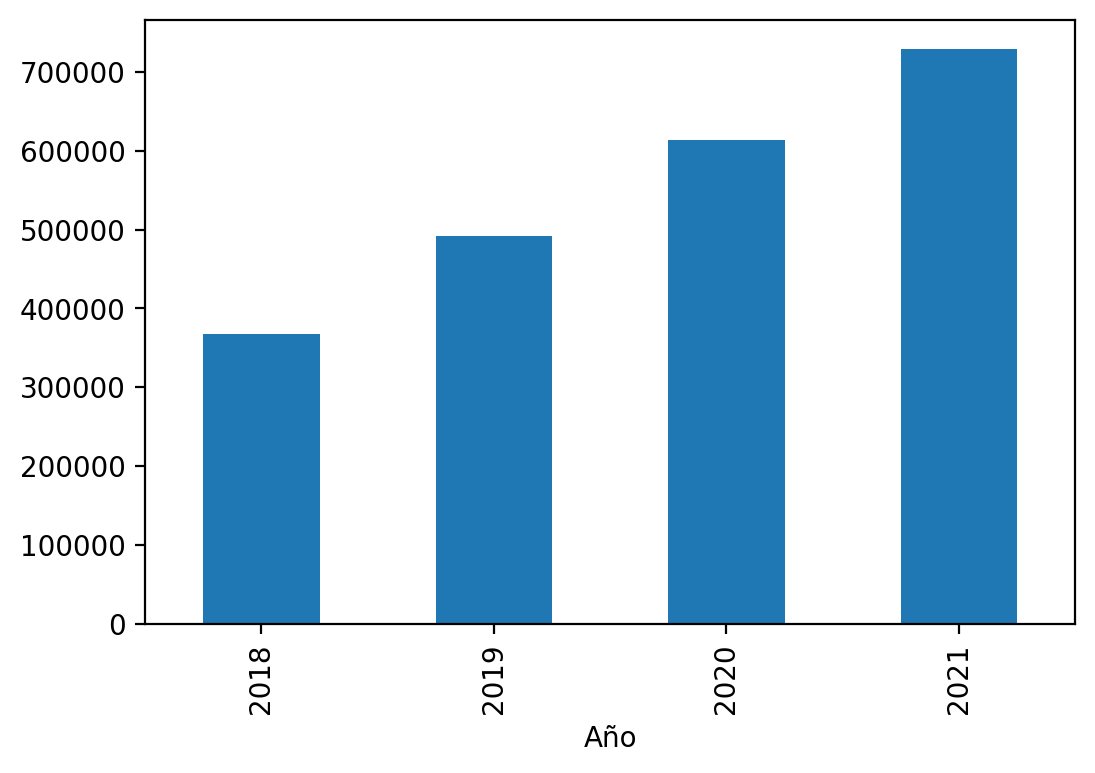

In [20]:
df.groupby('Año')['Ganancia'].sum().plot.bar()

Y las transacciones totales por año:

<AxesSubplot:xlabel='Año'>

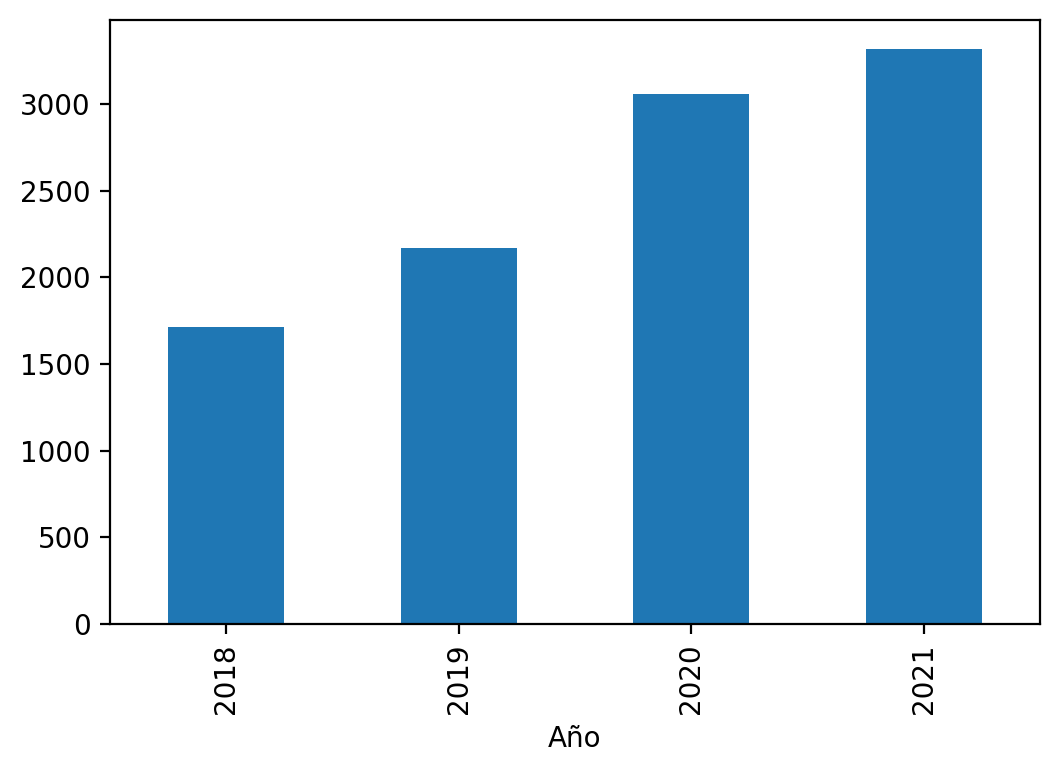

In [21]:
df.groupby('Año')['Id. del pedido'].count().plot.bar()

### Exploración mediante series temporales

In [22]:
df.dtypes

Id. de la fila                  int64
Id. del pedido                 object
Fecha del pedido       datetime64[ns]
Fecha de envío         datetime64[ns]
Forma de envío                 object
Id. del cliente                object
Nombre del cliente             object
Segmento                       object
Ciudad                         object
Estado                         object
País/Región                    object
Región                         object
Id. del producto               object
Categoría                      object
Subcategoría                   object
Nombre del producto            object
Ventas                        float64
Cantidad                        int64
Descuento                     float64
Ganancia                      float64
Año                             int64
Mes                             int64
dtype: object

Las dos columnas de fecha están en el formato correcto.

Ordenemos por fecha:

In [23]:
df1=df.sort_values('Fecha del pedido')

In [24]:
df1.head(1)

,Id. de la fila,Id. del pedido,Fecha del pedido,Fecha de envío,Forma de envío,Id. del cliente,Nombre del cliente,Segmento,Ciudad,Estado,...,Id. del producto,Categoría,Subcategoría,Nombre del producto,Ventas,Cantidad,Descuento,Ganancia,Año,Mes
3639,8187,MX-2018-160234,2018-01-03,2018-01-07,Estándar,SC-20785,Sandra Crespo,Cliente,Mixco,Guatemala,...,TEC-TE-10001721,Tecnología,Teléfonos,"Nokia Auriculares, Al por mayor",1952.0,4,0.0,448.8,2018,1


In [25]:
df1.tail(1)

,Id. de la fila,Id. del pedido,Fecha del pedido,Fecha de envío,Forma de envío,Id. del cliente,Nombre del cliente,Segmento,Ciudad,Estado,...,Id. del producto,Categoría,Subcategoría,Nombre del producto,Ventas,Cantidad,Descuento,Ganancia,Año,Mes
940,9475,MX-2021-158827,2021-12-31,2022-01-02,Urgente,VC-21535,Victoria Chavarría,Pequeña empresa,Chaguanas,Chaguanas,...,MAT-EL-10004550,Material de oficina,Electrodomésticos,"Cuisinart Batidora, Plateado",1354.8,3,0.0,175.8,2021,12


Las transacciones(según fecha de pedido) van desde el 3 de enero de 2018 hasta el 31 de diciembre de 2021.

HACER GRAFICO DE EVOLUCION DE TRANSACCIONES

Fijaremos como índice la fecha:

In [26]:
df1.set_index('Fecha del pedido',inplace=True)

In [27]:
df1.head()

,Id. de la fila,Id. del pedido,Fecha de envío,Forma de envío,Id. del cliente,Nombre del cliente,Segmento,Ciudad,Estado,País/Región,...,Id. del producto,Categoría,Subcategoría,Nombre del producto,Ventas,Cantidad,Descuento,Ganancia,Año,Mes
Fecha del pedido,,,,,,,,,,,,,,,,,,,,,
2018-01-03,8187,MX-2018-160234,2018-01-07,Estándar,SC-20785,Sandra Crespo,Cliente,Mixco,Guatemala,Guatemala,...,TEC-TE-10001721,Tecnología,Teléfonos,"Nokia Auriculares, Al por mayor",1952.0000,4,0.000,448.8000,2018,1
2018-01-04,9489,MX-2018-140641,2018-01-09,Estándar,LP-17785,Lara Porras,Empresa,Mérida,Yucatán,México,...,TEC-CO-10000763,Tecnología,Copiadoras,"Sharp Tinta, 2",1655.4824,2,0.002,494.2824,2018,1
2018-01-04,1970,MX-2018-111255,2018-01-09,Rápido,PC-19915,Patrocinio Castro,Cliente,Francisco Beltrão,Paraná,Brasil,...,MAT-SU-10003372,Material de oficina,Suministros,"Fiskars Abrecartas, Azul",1489.6000,8,0.000,281.6000,2018,1
2018-01-04,1971,MX-2018-111255,2018-01-09,Rápido,PC-19915,Patrocinio Castro,Cliente,Francisco Beltrão,Paraná,Brasil,...,MOB-LI-10001117,Mobiliario,Librerías,"Dania Librería clásica, Negro",16484.4000,6,0.000,6098.4000,2018,1
2018-01-04,10118,US-2018-136007,2018-01-11,Estándar,AH-11305,Ariadna Hernández,Pequeña empresa,Pilar,Alagoas,Brasil,...,MAT-SO-10002386,Material de oficina,Sobres,"Jiffy Sobres de uso interno, 50",743.0400,6,0.600,-1078.5600,2018,1


In [28]:
import seaborn as sns

Grafico ventas diarias

Text(0.5, 1.0, 'ventas diarias')

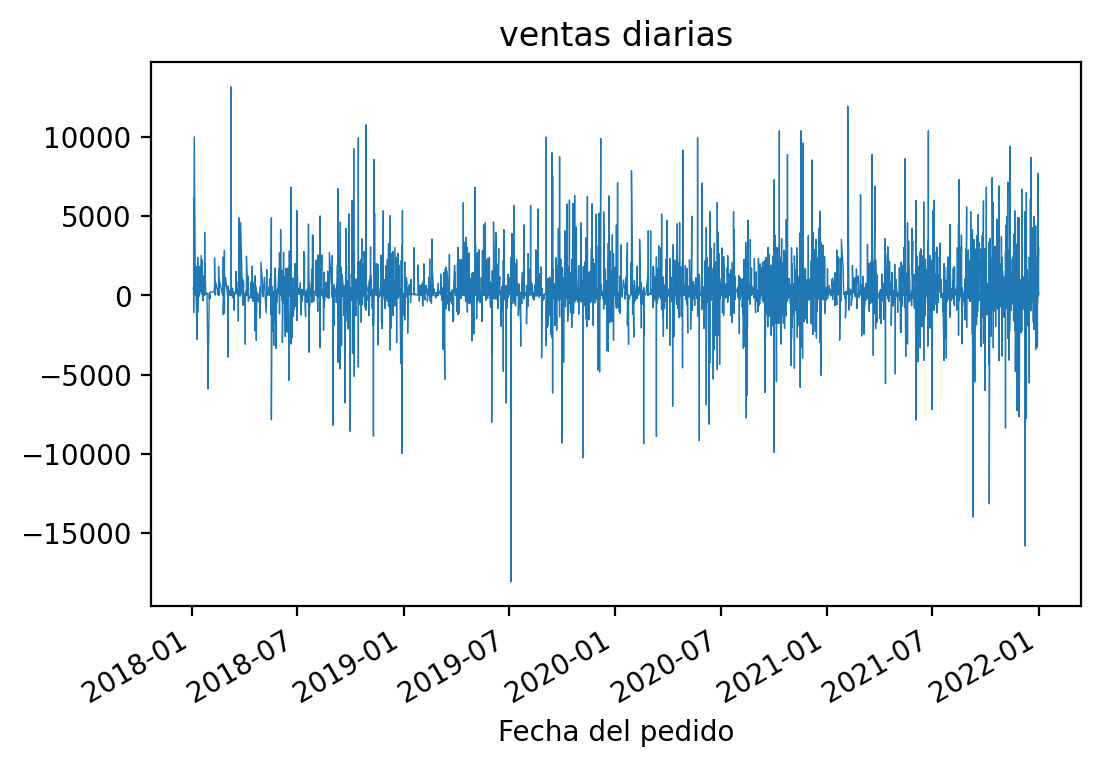

In [35]:
df1['Ganancia'].plot(linewidth=0.5)
plt.title('Ganancias diarias')

<AxesSubplot:xlabel='Año', ylabel='Ganancia'>

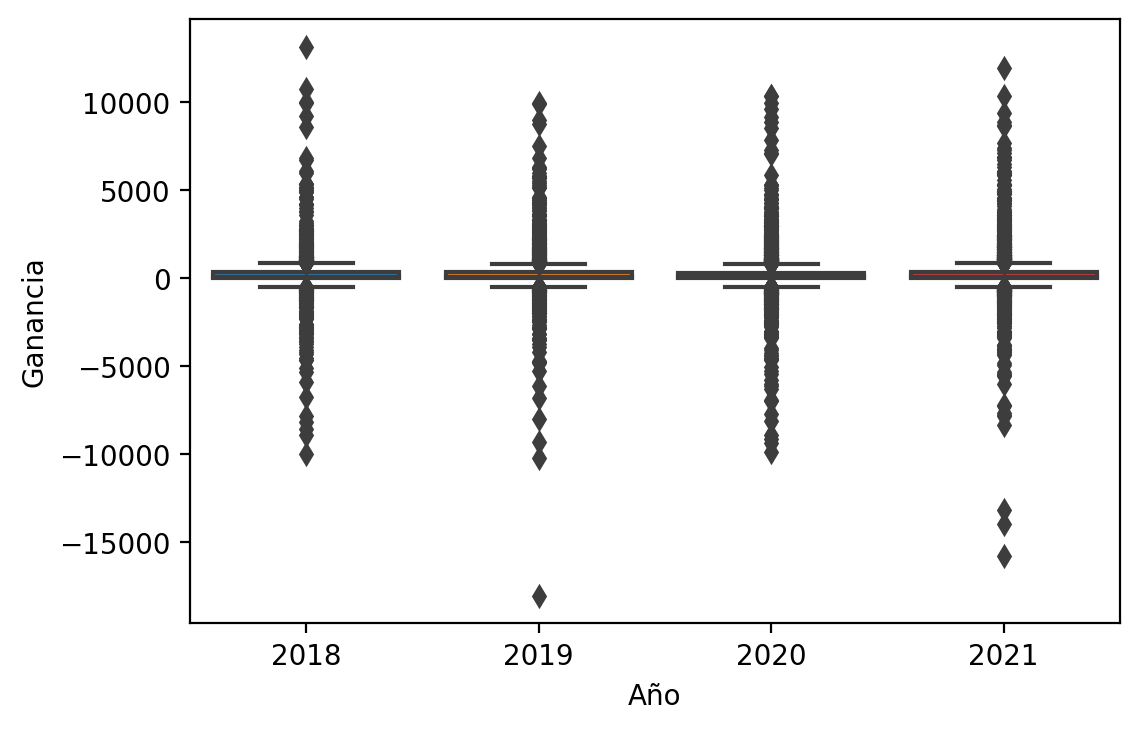

In [48]:

figsize=(2,1)
sns.boxplot(data=df1,x='Año',y='Ganancia')

El promedio de ganancias diarias crecen ligeramente de año en año, incluso se reducen de 2019 a 2020, pero las ganancias totales por año sí crecen de año en año como vimos antes.

¿Cuáles son los meses de más ganancia en cada año?

In [30]:
for Año in {'2018','2019','2020','2021'}:
    dfm=df1.loc[Año].groupby('Mes').sum()
    print(dfm.index[dfm['Ganancia']==dfm['Ganancia'].max()].tolist())
    

[5]
[9]
[10]
[12]


Los meses de más ganancia fueron:  2018,Mayo/2019,Septiembre/2020,Octubre/2021,Diciembre.

¿Cuáles son los meses de menos ganancia en cada año?

In [34]:
for Año in {'2018','2019','2020','2021'}:
    dfm=df1.loc[Año].groupby('Mes').sum()
    print(dfm.index[dfm['Ganancia']==dfm['Ganancia'].min()].tolist())

[2]
[3]
[4]
[5]


Los meses de menos ganancia fueron: 2018,Febrero/2019,Marzo/2020,Abril/2021,Mayo

### Haremos una proyección de venta para el 2022 y 2023

In [68]:
df_gan=df_gan_tot=df.groupby('Año')['Ganancia'].sum()

Año
2018    368134.8004
2019    491489.4960
2020    612963.2824
2021    729328.0616
Name: Ganancia, dtype: float64

In [108]:
df_gan_tot=pd.DataFrame({'Años':['2018','2019','2020','2021'],'Ganancia por año':df_gan})

In [109]:
df_gan_tot.head()

,Años,Ganancia por año
Año,,
2018,2018,368134.8004
2019,2019,491489.4960
2020,2020,612963.2824
2021,2021,729328.0616


In [110]:
df_gan_tot.dtypes

Años                 object
Ganancia por año    float64
dtype: object

In [115]:
df_gan_tot['Años']=df_gan_tot[['Años']].astype(float)

In [116]:
df_gan_tot.dtypes

Años                float64
Ganancia por año    float64
dtype: object

<AxesSubplot:xlabel='Años', ylabel='Ganancia por año'>

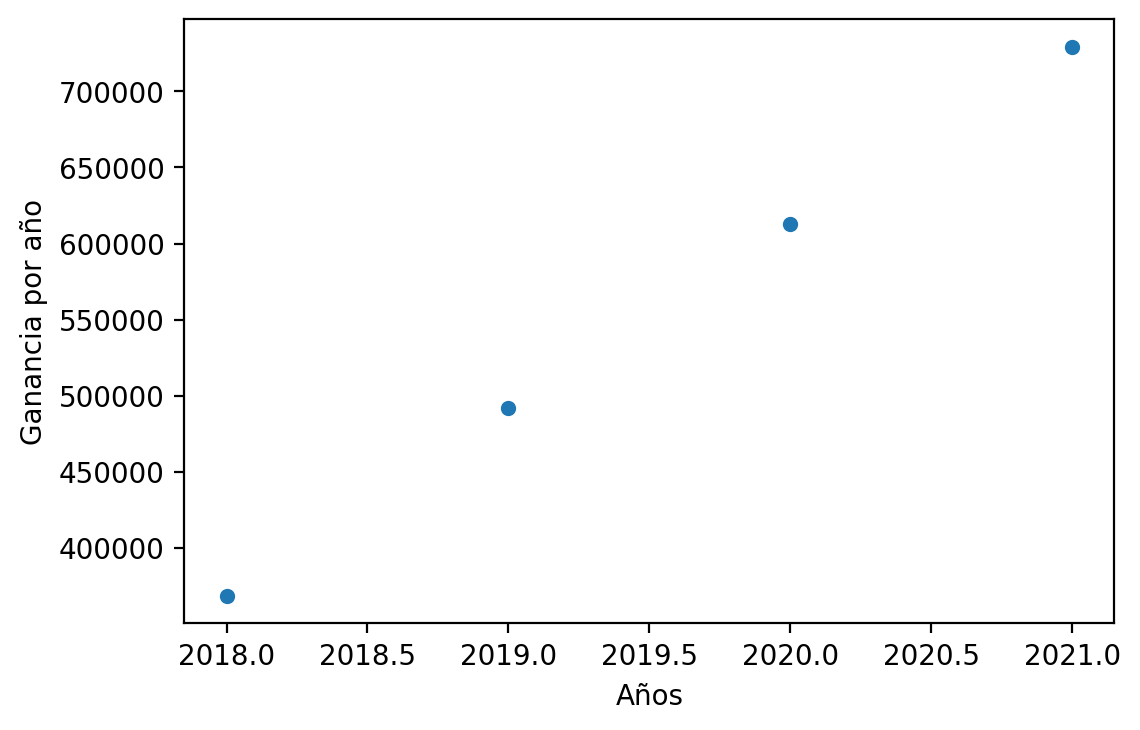

In [117]:
sns.scatterplot(x=df_gan_tot['Años'],y=df_gan_tot['Ganancia por año'],data=df_gan_tot)

In [118]:
df_gan_tot[['Años','Ganancia por año']].corr()

,Años,Ganancia por año
Años,1.000000,0.999912
Ganancia por año,0.999912,1.000000


Vemos que la correlación es prácticamente lineal perfecta y positiva.

Modelo de Regresión simple

In [124]:
from sklearn.linear_model import LinearRegression as LR
lm=LR()
X=df_gan_tot['Años'].values.reshape(-1,1)
y=df_gan_tot['Ganancia por año'].values

In [125]:
lm.fit(X,y)

LinearRegression()

In [131]:
import numpy as np

In [143]:
X_predict=np.array([2022,2023]).reshape(-1,1)

In [144]:
y_predict=lm.predict(X_predict)

In [145]:
y_predict

array([851742.30260003, 972247.65960002])

Predicción de Ganancias

para 2022: 851742,           

para 2023:972247